In [ ]:
# 🚗 OLA Bookings Dataset - Quick Analysis
A brief analysis of ride-hailing booking data with 70,000+ records.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Bookings-70000-Rows.csv')
print(f"📊 Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

📊 Dataset: 71,201 rows × 20 columns


,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,#NAME?
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,#NAME?
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,#NAME?
3,2024-07-22 3:15:00,3:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,#NAME?
4,2024-07-02 9:02:00,9:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,#NAME?


📈 BOOKING STATUS SUMMARY
Success: 44,271 (62.2%)
Canceled by Driver: 12,728 (17.9%)
Canceled by Customer: 7,214 (10.1%)
Driver Not Found: 6,988 (9.8%)

✅ Success Rate: 62.2%


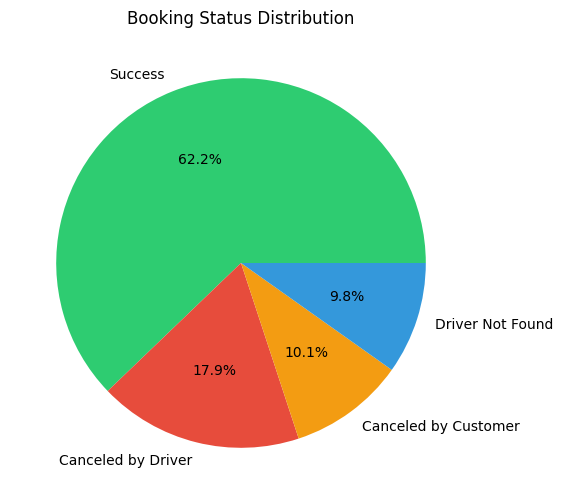

In [2]:
# Booking Status Distribution
status_counts = df['Booking_Status'].value_counts()
success_rate = (status_counts.get('Success', 0) / len(df)) * 100

print("📈 BOOKING STATUS SUMMARY")
print("=" * 40)
for status, count in status_counts.items():
    pct = (count / len(df)) * 100
    print(f"{status}: {count:,} ({pct:.1f}%)")
print(f"\n✅ Success Rate: {success_rate:.1f}%")

# Pie chart
plt.figure(figsize=(8, 6))
colors = ['#2ecc71', '#e74c3c', '#f39c12', '#3498db']
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=colors[:len(status_counts)])
plt.title('Booking Status Distribution')
plt.show()

🚗 VEHICLE TYPE DISTRIBUTION
eBike: 10,271 bookings
Prime Sedan: 10,260 bookings
Bike: 10,193 bookings
Auto: 10,178 bookings
Prime Plus: 10,174 bookings
Prime SUV: 10,108 bookings
Mini: 10,017 bookings


C:\Users\shiva\AppData\Local\Temp\ipykernel_19128\2484228746.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette='viridis')


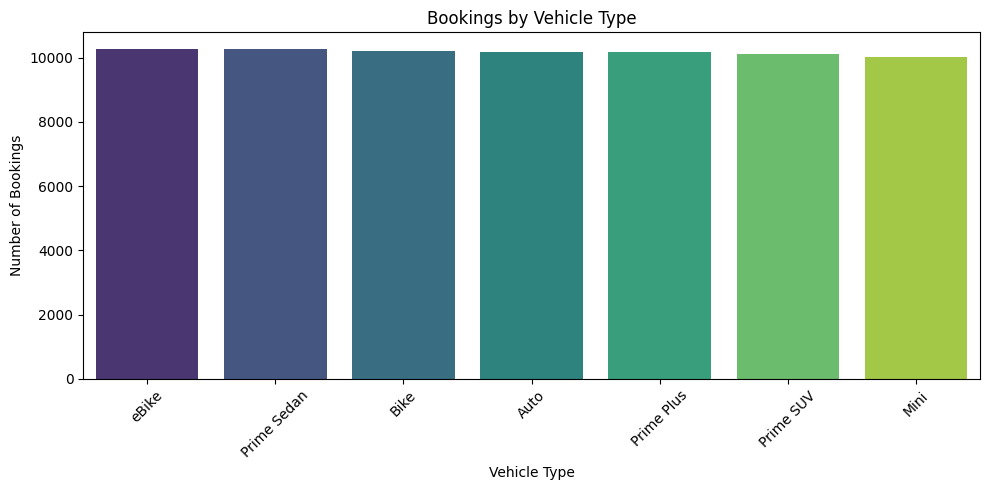

In [3]:
# Vehicle Type Analysis
vehicle_counts = df['Vehicle_Type'].value_counts()

print("🚗 VEHICLE TYPE DISTRIBUTION")
print("=" * 40)
for vehicle, count in vehicle_counts.items():
    print(f"{vehicle}: {count:,} bookings")

plt.figure(figsize=(10, 5))
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette='viridis')
plt.title('Bookings by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
# Revenue Analysis (Successful rides only)
successful = df[df['Booking_Status'] == 'Success']
total_revenue = successful['Booking_Value'].sum()
avg_booking = successful['Booking_Value'].mean()

print("💰 REVENUE SUMMARY")
print("=" * 40)
print(f"Total Revenue: ₹{total_revenue:,.0f}")
print(f"Average Booking Value: ₹{avg_booking:.2f}")
print(f"Successful Rides: {len(successful):,}")

# Payment Method breakdown
payment_revenue = successful.groupby('Payment_Method')['Booking_Value'].agg(['sum', 'count'])
print("\n📱 Revenue by Payment Method:")
for method, row in payment_revenue.iterrows():
    print(f"  {method}: ₹{row['sum']:,.0f} ({row['count']:,} rides)")

💰 REVENUE SUMMARY
Total Revenue: ₹24,216,619
Average Booking Value: ₹547.01
Successful Rides: 44,271

📱 Revenue by Payment Method:
  Cash: ₹13,259,198 (24,166 rides)
  Credit Card: ₹900,354 (1,683 rides)
  Debit Card: ₹239,672 (448 rides)
  UPI: ₹9,817,395 (17,974 rides)


⭐ RATINGS SUMMARY
Average Driver Rating: 4.00/5
Average Customer Rating: 4.00/5


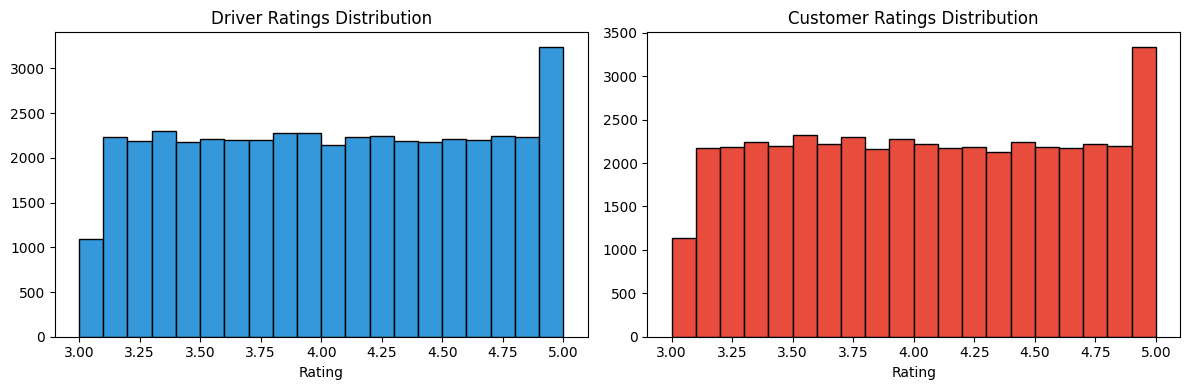

In [5]:
# Ratings Overview
avg_driver_rating = successful['Driver_Ratings'].mean()
avg_customer_rating = successful['Customer_Rating'].mean()

print("⭐ RATINGS SUMMARY")
print("=" * 40)
print(f"Average Driver Rating: {avg_driver_rating:.2f}/5")
print(f"Average Customer Rating: {avg_customer_rating:.2f}/5")

# Rating distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(successful['Driver_Ratings'].dropna(), bins=20, color='#3498db', edgecolor='black')
axes[0].set_title('Driver Ratings Distribution')
axes[0].set_xlabel('Rating')
axes[1].hist(successful['Customer_Rating'].dropna(), bins=20, color='#e74c3c', edgecolor='black')
axes[1].set_title('Customer Ratings Distribution')
axes[1].set_xlabel('Rating')
plt.tight_layout()
plt.show()

In [6]:
# Key Insights Summary
print("🔑 KEY INSIGHTS")
print("=" * 50)
print(f"• Total Bookings: {len(df):,}")
print(f"• Success Rate: {success_rate:.1f}%")
print(f"• Total Revenue: ₹{total_revenue:,.0f}")
print(f"• Most Popular Vehicle: {vehicle_counts.index[0]}")
print(f"• Avg Driver Rating: {avg_driver_rating:.2f}⭐")
print(f"• Avg Ride Distance: {successful['Ride_Distance'].mean():.1f} km")

🔑 KEY INSIGHTS
• Total Bookings: 71,201
• Success Rate: 62.2%
• Total Revenue: ₹24,216,619
• Most Popular Vehicle: eBike
• Avg Driver Rating: 4.00⭐
• Avg Ride Distance: 22.8 km


In [9]:
# Save all charts as images for the report (Extended Version)
import os
import numpy as np

# Create images folder
os.makedirs('report_images', exist_ok=True)

# 1. Booking Status Pie Chart
plt.figure(figsize=(10, 7))
colors = ['#2ecc71', '#e74c3c', '#f39c12', '#3498db']
explode = (0.05, 0, 0, 0)
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=colors[:len(status_counts)], explode=explode, shadow=True)
plt.title('Booking Status Distribution', fontsize=16, fontweight='bold')
plt.savefig('report_images/booking_status.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.close()

# 2. Vehicle Type Bar Chart
plt.figure(figsize=(12, 6))
colors_vehicle = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22']
bars = plt.bar(vehicle_counts.index, vehicle_counts.values, color=colors_vehicle)
plt.title('Bookings by Vehicle Type', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45, ha='right')
for bar, count in zip(bars, vehicle_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, f'{count:,}', ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.savefig('report_images/vehicle_types.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.close()

# 3. Payment Method Pie Chart
payment_counts = successful['Payment_Method'].value_counts()
plt.figure(figsize=(10, 7))
colors_pay = ['#27ae60', '#3498db', '#e74c3c', '#f1c40f']
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=colors_pay, shadow=True)
plt.title('Payment Method Distribution', fontsize=16, fontweight='bold')
plt.savefig('report_images/payment_methods.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.close()

# 4. Ratings Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(successful['Driver_Ratings'].dropna(), bins=20, color='#3498db', edgecolor='black', alpha=0.8)
axes[0].axvline(avg_driver_rating, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_driver_rating:.2f}')
axes[0].set_title('Driver Ratings Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rating', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].legend()

axes[1].hist(successful['Customer_Rating'].dropna(), bins=20, color='#e74c3c', edgecolor='black', alpha=0.8)
axes[1].axvline(avg_customer_rating, color='blue', linestyle='--', linewidth=2, label=f'Mean: {avg_customer_rating:.2f}')
axes[1].set_title('Customer Ratings Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Rating', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].legend()
plt.tight_layout()
plt.savefig('report_images/ratings_distribution.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.close()

# 5. NEW: Cancellation Reasons Analysis
customer_cancel_reasons = df[df['Booking_Status'] == 'Canceled by Customer']['Canceled_Rides_by_Customer'].value_counts()
driver_cancel_reasons = df[df['Booking_Status'] == 'Canceled by Driver']['Canceled_Rides_by_Driver'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].barh(customer_cancel_reasons.index, customer_cancel_reasons.values, color='#e74c3c')
axes[0].set_title('Customer Cancellation Reasons', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count')
for i, v in enumerate(customer_cancel_reasons.values):
    axes[0].text(v + 50, i, f'{v:,}', va='center', fontsize=10)

axes[1].barh(driver_cancel_reasons.index, driver_cancel_reasons.values, color='#f39c12')
axes[1].set_title('Driver Cancellation Reasons', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Count')
for i, v in enumerate(driver_cancel_reasons.values):
    axes[1].text(v + 50, i, f'{v:,}', va='center', fontsize=10)
plt.tight_layout()
plt.savefig('report_images/cancellation_reasons.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.close()

# 6. NEW: Revenue by Vehicle Type
vehicle_revenue = successful.groupby('Vehicle_Type')['Booking_Value'].agg(['sum', 'mean', 'count'])
vehicle_revenue = vehicle_revenue.sort_values('sum', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(vehicle_revenue.index, vehicle_revenue['sum']/1000000, color='#2ecc71')
axes[0].set_title('Total Revenue by Vehicle Type (in Millions ₹)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Vehicle Type')
axes[0].set_ylabel('Revenue (₹ Millions)')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(vehicle_revenue.index, vehicle_revenue['mean'], color='#9b59b6')
axes[1].set_title('Average Booking Value by Vehicle Type (₹)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Vehicle Type')
axes[1].set_ylabel('Avg Booking Value (₹)')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('report_images/revenue_by_vehicle.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.close()

# 7. NEW: Distance Distribution
plt.figure(figsize=(12, 5))
plt.hist(successful['Ride_Distance'].dropna(), bins=50, color='#1abc9c', edgecolor='black', alpha=0.8)
plt.axvline(successful['Ride_Distance'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {successful["Ride_Distance"].mean():.1f} km')
plt.axvline(successful['Ride_Distance'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {successful["Ride_Distance"].median():.1f} km')
plt.title('Ride Distance Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.savefig('report_images/distance_distribution.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.close()

# 8. NEW: Top Pickup Locations
top_pickup = df['Pickup_Location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
bars = plt.barh(top_pickup.index[::-1], top_pickup.values[::-1], color='#3498db')
plt.title('Top 10 Pickup Locations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Bookings', fontsize=12)
for bar, count in zip(bars, top_pickup.values[::-1]):
    plt.text(count + 50, bar.get_y() + bar.get_height()/2, f'{count:,}', va='center', fontsize=10)
plt.tight_layout()
plt.savefig('report_images/top_locations.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.close()

# 9. NEW: Hourly Booking Pattern
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
hourly_bookings = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(14, 5))
plt.plot(hourly_bookings.index, hourly_bookings.values, marker='o', linewidth=2, markersize=8, color='#e74c3c')
plt.fill_between(hourly_bookings.index, hourly_bookings.values, alpha=0.3, color='#e74c3c')
plt.title('Hourly Booking Pattern (24-Hour)', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.savefig('report_images/hourly_pattern.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.close()

# 10. NEW: Success Rate by Vehicle Type
success_by_vehicle = df.groupby('Vehicle_Type').apply(lambda x: (x['Booking_Status'] == 'Success').sum() / len(x) * 100)
success_by_vehicle = success_by_vehicle.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors_success = ['#2ecc71' if x > 60 else '#f39c12' if x > 50 else '#e74c3c' for x in success_by_vehicle.values]
bars = plt.bar(success_by_vehicle.index, success_by_vehicle.values, color=colors_success)
plt.title('Success Rate by Vehicle Type (%)', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.axhline(y=success_rate, color='red', linestyle='--', label=f'Overall: {success_rate:.1f}%')
plt.xticks(rotation=45, ha='right')
for bar, rate in zip(bars, success_by_vehicle.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{rate:.1f}%', ha='center', fontsize=10)
plt.legend()
plt.tight_layout()
plt.savefig('report_images/success_rate_vehicle.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.close()

print("✅ All 10 chart images saved to 'report_images' folder!")

✅ All 10 chart images saved to 'report_images' folder!


C:\Users\shiva\AppData\Local\Temp\ipykernel_19128\3878939899.py:139: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  success_by_vehicle = df.groupby('Vehicle_Type').apply(lambda x: (x['Booking_Status'] == 'Success').sum() / len(x) * 100)


In [10]:
# Generate Extended Word Document Report
from docx import Document
from docx.shared import Inches, Pt, RGBColor, Cm
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.table import WD_TABLE_ALIGNMENT
from docx.enum.style import WD_STYLE_TYPE
from datetime import datetime

# Create document
doc = Document()

# ==================== TITLE PAGE ====================
doc.add_paragraph()
doc.add_paragraph()
title = doc.add_heading('OLA BOOKINGS', 0)
title.alignment = WD_ALIGN_PARAGRAPH.CENTER

title2 = doc.add_heading('Data Analysis Report', 0)
title2.alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_paragraph()
subtitle = doc.add_paragraph('Comprehensive Analysis of Ride-Hailing Operations')
subtitle.alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_paragraph()
doc.add_paragraph()

# Info box
info = doc.add_paragraph()
info.add_run('Dataset: ').bold = True
info.add_run(f'{len(df):,} Booking Records\n')
info.add_run('Period: ').bold = True
info.add_run('July 2024\n')
info.add_run('Report Date: ').bold = True
info.add_run('November 2025')
info.alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_page_break()

# ==================== TABLE OF CONTENTS ====================
doc.add_heading('Table of Contents', level=1)
toc_items = [
    '1. Executive Summary',
    '2. Key Performance Indicators (KPIs)',
    '3. Booking Status Analysis',
    '4. Vehicle Type Analysis',
    '5. Revenue & Financial Analysis',
    '6. Payment Methods Analysis',
    '7. Cancellation Analysis',
    '8. Geographic Analysis',
    '9. Time-Based Analysis',
    '10. Customer & Driver Ratings',
    '11. Key Findings & Insights',
    '12. Strategic Recommendations',
    '13. Conclusion'
]
for item in toc_items:
    doc.add_paragraph(item, style='List Number')

doc.add_page_break()

# ==================== 1. EXECUTIVE SUMMARY ====================
doc.add_heading('1. Executive Summary', level=1)

doc.add_paragraph(
    f'This comprehensive report presents an in-depth analysis of OLA ride-hailing booking data, '
    f'encompassing {len(df):,} individual booking records collected during July 2024. The analysis '
    f'provides actionable insights into operational efficiency, customer behavior, revenue patterns, '
    f'and service quality metrics that are critical for strategic decision-making.'
)

doc.add_heading('1.1 Scope of Analysis', level=2)
doc.add_paragraph(
    'The analysis covers the following key dimensions:'
)
scope_items = [
    'Booking success and failure patterns across different booking statuses',
    'Vehicle type preferences and their impact on business metrics',
    'Revenue generation and payment method distribution',
    'Cancellation trends and root cause analysis',
    'Geographic distribution of rides across pickup locations',
    'Time-based patterns including hourly and daily trends',
    'Customer and driver satisfaction through rating analysis'
]
for item in scope_items:
    doc.add_paragraph(item, style='List Bullet')

doc.add_heading('1.2 Key Highlights', level=2)
highlights = doc.add_paragraph()
highlights.add_run('• Success Rate: ').bold = True
highlights.add_run(f'{success_rate:.1f}% of all bookings completed successfully\n')
highlights.add_run('• Total Revenue: ').bold = True
highlights.add_run(f'₹{total_revenue:,.0f} generated from {len(successful):,} successful rides\n')
highlights.add_run('• Average Booking: ').bold = True
highlights.add_run(f'₹{avg_booking:.2f} per successful ride\n')
highlights.add_run('• Service Quality: ').bold = True
highlights.add_run(f'{avg_driver_rating:.2f}/5.0 average driver rating\n')
highlights.add_run('• Primary Payment: ').bold = True
highlights.add_run(f'Cash transactions dominate at {(payment_counts["Cash"]/len(successful)*100):.1f}%')

doc.add_page_break()

# ==================== 2. KEY PERFORMANCE INDICATORS ====================
doc.add_heading('2. Key Performance Indicators (KPIs)', level=1)

doc.add_paragraph(
    'The following table summarizes the critical performance metrics derived from the dataset analysis:'
)

# Enhanced KPI Table
table = doc.add_table(rows=12, cols=3)
table.style = 'Table Grid'

# Header row
table.rows[0].cells[0].text = 'Category'
table.rows[0].cells[1].text = 'Metric'
table.rows[0].cells[2].text = 'Value'

kpis = [
    ('Volume', 'Total Bookings', f'{len(df):,}'),
    ('Volume', 'Successful Rides', f'{len(successful):,}'),
    ('Volume', 'Failed Bookings', f'{len(df) - len(successful):,}'),
    ('Performance', 'Success Rate', f'{success_rate:.1f}%'),
    ('Performance', 'Cancellation Rate', f'{((len(df)-len(successful))/len(df)*100):.1f}%'),
    ('Financial', 'Total Revenue', f'₹{total_revenue:,.0f}'),
    ('Financial', 'Average Booking Value', f'₹{avg_booking:.2f}'),
    ('Financial', 'Revenue per Day', f'₹{total_revenue/30:,.0f}'),
    ('Operations', 'Average Ride Distance', f'{successful["Ride_Distance"].mean():.1f} km'),
    ('Operations', 'Total Distance Covered', f'{successful["Ride_Distance"].sum():,.0f} km'),
    ('Quality', 'Average Driver Rating', f'{avg_driver_rating:.2f}/5.0'),
]

for i, (cat, metric, value) in enumerate(kpis, 1):
    table.rows[i].cells[0].text = cat
    table.rows[i].cells[1].text = metric
    table.rows[i].cells[2].text = value

doc.add_paragraph()

# KPI Analysis
doc.add_heading('2.1 KPI Interpretation', level=2)
doc.add_paragraph(
    f'The success rate of {success_rate:.1f}% indicates that approximately 4 out of every 10 booking attempts '
    f'do not result in a completed ride. This represents a significant opportunity for operational improvement. '
    f'The daily revenue average of ₹{total_revenue/30:,.0f} suggests consistent demand, though addressing '
    f'the {((len(df)-len(successful))/len(df)*100):.1f}% booking failure rate could substantially increase revenue.'
)

doc.add_page_break()

# ==================== 3. BOOKING STATUS ANALYSIS ====================
doc.add_heading('3. Booking Status Analysis', level=1)

doc.add_heading('3.1 Overview', level=2)
doc.add_paragraph(
    f'Understanding the distribution of booking outcomes is crucial for identifying operational bottlenecks. '
    f'The analysis reveals four distinct booking statuses, each representing different customer journey endpoints.'
)

# Status breakdown table
status_table = doc.add_table(rows=5, cols=4)
status_table.style = 'Table Grid'
status_table.rows[0].cells[0].text = 'Status'
status_table.rows[0].cells[1].text = 'Count'
status_table.rows[0].cells[2].text = 'Percentage'
status_table.rows[0].cells[3].text = 'Impact'

status_data = [
    ('Success', status_counts.get('Success', 0), 'Positive - Revenue Generated'),
    ('Canceled by Driver', status_counts.get('Canceled by Driver', 0), 'Negative - Customer Dissatisfaction'),
    ('Canceled by Customer', status_counts.get('Canceled by Customer', 0), 'Neutral - Customer Choice'),
    ('Driver Not Found', status_counts.get('Driver Not Found', 0), 'Negative - Supply Issue')
]

for i, (status, count, impact) in enumerate(status_data, 1):
    status_table.rows[i].cells[0].text = status
    status_table.rows[i].cells[1].text = f'{count:,}'
    status_table.rows[i].cells[2].text = f'{(count/len(df)*100):.1f}%'
    status_table.rows[i].cells[3].text = impact

doc.add_paragraph()
doc.add_picture('report_images/booking_status.png', width=Inches(5))
doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
doc.add_paragraph('Figure 3.1: Distribution of Booking Statuses', style='Caption').alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_heading('3.2 Analysis of Failed Bookings', level=2)
failed_bookings = len(df) - len(successful)
doc.add_paragraph(
    f'A total of {failed_bookings:,} bookings ({((failed_bookings)/len(df)*100):.1f}%) did not complete successfully. '
    f'This is broken down as follows:'
)

doc.add_paragraph(
    f'• Driver Cancellations: {status_counts.get("Canceled by Driver", 0):,} bookings ({(status_counts.get("Canceled by Driver", 0)/len(df)*100):.1f}%) - '
    f'This is the largest category of failed bookings and represents a critical area for improvement. '
    f'Driver cancellations directly impact customer trust and platform reliability.', style='List Bullet'
)
doc.add_paragraph(
    f'• Customer Cancellations: {status_counts.get("Canceled by Customer", 0):,} bookings ({(status_counts.get("Canceled by Customer", 0)/len(df)*100):.1f}%) - '
    f'While customer cancellations are often unavoidable, understanding the reasons can help reduce this number.', style='List Bullet'
)
doc.add_paragraph(
    f'• Driver Not Found: {status_counts.get("Driver Not Found", 0):,} bookings ({(status_counts.get("Driver Not Found", 0)/len(df)*100):.1f}%) - '
    f'This indicates supply-demand imbalance in certain areas or times, requiring fleet optimization.', style='List Bullet'
)

doc.add_page_break()

# ==================== 4. VEHICLE TYPE ANALYSIS ====================
doc.add_heading('4. Vehicle Type Analysis', level=1)

doc.add_heading('4.1 Fleet Composition', level=2)
doc.add_paragraph(
    'OLA operates a diverse fleet of 7 vehicle categories, each catering to different customer segments and price points. '
    'The distribution of bookings across vehicle types provides insights into customer preferences and market demand.'
)

doc.add_picture('report_images/vehicle_types.png', width=Inches(5.5))
doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
doc.add_paragraph('Figure 4.1: Booking Distribution by Vehicle Type', style='Caption').alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_heading('4.2 Vehicle-wise Breakdown', level=2)

# Vehicle breakdown table
veh_table = doc.add_table(rows=len(vehicle_counts)+1, cols=4)
veh_table.style = 'Table Grid'
veh_table.rows[0].cells[0].text = 'Vehicle Type'
veh_table.rows[0].cells[1].text = 'Bookings'
veh_table.rows[0].cells[2].text = 'Market Share'
veh_table.rows[0].cells[3].text = 'Category'

vehicle_categories = {
    'Bike': 'Economy', 'eBike': 'Economy', 'Auto': 'Economy',
    'Mini': 'Standard', 'Prime Sedan': 'Premium', 'Prime Plus': 'Premium', 'Prime SUV': 'Luxury'
}

for i, (vehicle, count) in enumerate(vehicle_counts.items(), 1):
    veh_table.rows[i].cells[0].text = vehicle
    veh_table.rows[i].cells[1].text = f'{count:,}'
    veh_table.rows[i].cells[2].text = f'{(count/len(df)*100):.1f}%'
    veh_table.rows[i].cells[3].text = vehicle_categories.get(vehicle, 'Other')

doc.add_paragraph()

doc.add_heading('4.3 Success Rate by Vehicle Type', level=2)
doc.add_paragraph(
    'Different vehicle types exhibit varying success rates, which may be influenced by driver availability, '
    'pricing, and customer behavior specific to each segment.'
)
doc.add_picture('report_images/success_rate_vehicle.png', width=Inches(5))
doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
doc.add_paragraph('Figure 4.2: Success Rate Comparison by Vehicle Type', style='Caption').alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_page_break()

# ==================== 5. REVENUE & FINANCIAL ANALYSIS ====================
doc.add_heading('5. Revenue & Financial Analysis', level=1)

doc.add_heading('5.1 Revenue Overview', level=2)
doc.add_paragraph(
    f'The platform generated a total revenue of ₹{total_revenue:,.0f} from {len(successful):,} successful rides '
    f'during the analysis period. This translates to:'
)

revenue_metrics = [
    f'Average Revenue per Ride: ₹{avg_booking:.2f}',
    f'Daily Average Revenue: ₹{total_revenue/30:,.0f} (assuming 30-day period)',
    f'Revenue per Kilometer: ₹{total_revenue/successful["Ride_Distance"].sum():.2f}',
    f'Potential Lost Revenue (from failed bookings): Estimated ₹{(len(df)-len(successful))*avg_booking:,.0f}'
]
for metric in revenue_metrics:
    doc.add_paragraph(metric, style='List Bullet')

doc.add_heading('5.2 Revenue by Vehicle Type', level=2)
doc.add_paragraph(
    'Analyzing revenue contribution by vehicle type helps identify the most profitable segments '
    'and informs fleet allocation decisions.'
)

doc.add_picture('report_images/revenue_by_vehicle.png', width=Inches(6))
doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
doc.add_paragraph('Figure 5.1: Revenue Analysis by Vehicle Type', style='Caption').alignment = WD_ALIGN_PARAGRAPH.CENTER

# Revenue by vehicle table
doc.add_paragraph()
rev_table = doc.add_table(rows=len(vehicle_revenue)+1, cols=4)
rev_table.style = 'Table Grid'
rev_table.rows[0].cells[0].text = 'Vehicle Type'
rev_table.rows[0].cells[1].text = 'Total Revenue'
rev_table.rows[0].cells[2].text = 'Avg Booking'
rev_table.rows[0].cells[3].text = 'Rides'

for i, (vehicle, row) in enumerate(vehicle_revenue.iterrows(), 1):
    rev_table.rows[i].cells[0].text = vehicle
    rev_table.rows[i].cells[1].text = f'₹{row["sum"]:,.0f}'
    rev_table.rows[i].cells[2].text = f'₹{row["mean"]:.2f}'
    rev_table.rows[i].cells[3].text = f'{int(row["count"]):,}'

doc.add_page_break()

# ==================== 6. PAYMENT METHODS ANALYSIS ====================
doc.add_heading('6. Payment Methods Analysis', level=1)

doc.add_heading('6.1 Payment Distribution', level=2)
doc.add_paragraph(
    'Understanding payment preferences is crucial for optimizing the checkout experience and '
    'planning financial operations. The analysis reveals clear customer preferences:'
)

doc.add_picture('report_images/payment_methods.png', width=Inches(4.5))
doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
doc.add_paragraph('Figure 6.1: Payment Method Distribution', style='Caption').alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_heading('6.2 Detailed Breakdown', level=2)

pay_detail_table = doc.add_table(rows=len(payment_revenue)+1, cols=4)
pay_detail_table.style = 'Table Grid'
pay_detail_table.rows[0].cells[0].text = 'Payment Method'
pay_detail_table.rows[0].cells[1].text = 'Revenue'
pay_detail_table.rows[0].cells[2].text = 'Transactions'
pay_detail_table.rows[0].cells[3].text = 'Avg Transaction'

for i, (method, row) in enumerate(payment_revenue.iterrows(), 1):
    pay_detail_table.rows[i].cells[0].text = method
    pay_detail_table.rows[i].cells[1].text = f'₹{row["sum"]:,.0f}'
    pay_detail_table.rows[i].cells[2].text = f'{int(row["count"]):,}'
    pay_detail_table.rows[i].cells[3].text = f'₹{row["sum"]/row["count"]:.2f}'

doc.add_paragraph()
doc.add_heading('6.3 Key Observations', level=2)
cash_pct = payment_counts.get('Cash', 0) / len(successful) * 100
upi_pct = payment_counts.get('UPI', 0) / len(successful) * 100
digital_pct = 100 - cash_pct

doc.add_paragraph(
    f'• Cash dominates with {cash_pct:.1f}% of transactions, indicating customer preference for '
    f'physical payment or limited digital payment adoption in certain demographics.', style='List Bullet'
)
doc.add_paragraph(
    f'• UPI accounts for {upi_pct:.1f}% of payments, showing growing adoption of digital payment methods.', style='List Bullet'
)
doc.add_paragraph(
    f'• Digital payments (UPI + Cards) together constitute {digital_pct:.1f}% of transactions, '
    f'presenting an opportunity for promoting cashless rides through incentives.', style='List Bullet'
)

doc.add_page_break()

# ==================== 7. CANCELLATION ANALYSIS ====================
doc.add_heading('7. Cancellation Analysis', level=1)

doc.add_heading('7.1 Cancellation Overview', level=2)
total_cancellations = status_counts.get('Canceled by Driver', 0) + status_counts.get('Canceled by Customer', 0)
doc.add_paragraph(
    f'Cancellations represent a significant operational challenge, with {total_cancellations:,} rides '
    f'({(total_cancellations/len(df)*100):.1f}%) being canceled either by drivers or customers. '
    f'Understanding the root causes is essential for improving completion rates.'
)

doc.add_heading('7.2 Cancellation Reasons', level=2)
doc.add_picture('report_images/cancellation_reasons.png', width=Inches(6))
doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
doc.add_paragraph('Figure 7.1: Analysis of Cancellation Reasons', style='Caption').alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_heading('7.3 Customer Cancellation Analysis', level=2)
doc.add_paragraph(f'Customers canceled {status_counts.get("Canceled by Customer", 0):,} bookings for the following reasons:')

for reason, count in customer_cancel_reasons.items():
    pct = count / status_counts.get('Canceled by Customer', 1) * 100
    doc.add_paragraph(f'{reason}: {count:,} ({pct:.1f}%)', style='List Bullet')

doc.add_heading('7.4 Driver Cancellation Analysis', level=2)
doc.add_paragraph(f'Drivers canceled {status_counts.get("Canceled by Driver", 0):,} bookings for the following reasons:')

for reason, count in driver_cancel_reasons.items():
    pct = count / status_counts.get('Canceled by Driver', 1) * 100
    doc.add_paragraph(f'{reason}: {count:,} ({pct:.1f}%)', style='List Bullet')

doc.add_page_break()

# ==================== 8. GEOGRAPHIC ANALYSIS ====================
doc.add_heading('8. Geographic Analysis', level=1)

doc.add_heading('8.1 Top Pickup Locations', level=2)
doc.add_paragraph(
    'Analyzing pickup locations helps identify high-demand areas and optimize driver positioning. '
    'The top 10 pickup locations account for a significant portion of total bookings.'
)

doc.add_picture('report_images/top_locations.png', width=Inches(5.5))
doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
doc.add_paragraph('Figure 8.1: Top 10 Pickup Locations by Booking Volume', style='Caption').alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_heading('8.2 Location Statistics', level=2)
unique_pickup = df['Pickup_Location'].nunique()
unique_drop = df['Drop_Location'].nunique()

doc.add_paragraph(f'• Total Unique Pickup Locations: {unique_pickup}', style='List Bullet')
doc.add_paragraph(f'• Total Unique Drop Locations: {unique_drop}', style='List Bullet')
doc.add_paragraph(f'• Average Bookings per Location: {len(df)/unique_pickup:.0f}', style='List Bullet')
doc.add_paragraph(f'• Top Location Share: {(top_pickup.values[0]/len(df)*100):.1f}% of all bookings', style='List Bullet')

doc.add_page_break()

# ==================== 9. TIME-BASED ANALYSIS ====================
doc.add_heading('9. Time-Based Analysis', level=1)

doc.add_heading('9.1 Hourly Booking Pattern', level=2)
doc.add_paragraph(
    'Understanding when customers book rides helps optimize driver supply and implement surge pricing effectively. '
    'The hourly distribution reveals clear patterns aligned with commute times and daily activities.'
)

doc.add_picture('report_images/hourly_pattern.png', width=Inches(6))
doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
doc.add_paragraph('Figure 9.1: 24-Hour Booking Distribution', style='Caption').alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_heading('9.2 Peak Hours Analysis', level=2)
peak_hour = hourly_bookings.idxmax()
peak_bookings = hourly_bookings.max()
off_peak_hour = hourly_bookings.idxmin()
off_peak_bookings = hourly_bookings.min()

doc.add_paragraph(f'• Peak Hour: {peak_hour}:00 with {peak_bookings:,} bookings', style='List Bullet')
doc.add_paragraph(f'• Off-Peak Hour: {off_peak_hour}:00 with {off_peak_bookings:,} bookings', style='List Bullet')
doc.add_paragraph(f'• Peak to Off-Peak Ratio: {peak_bookings/off_peak_bookings:.1f}x', style='List Bullet')
doc.add_paragraph(f'• Morning Rush (7-10 AM): {hourly_bookings[7:11].sum():,} bookings', style='List Bullet')
doc.add_paragraph(f'• Evening Rush (5-9 PM): {hourly_bookings[17:22].sum():,} bookings', style='List Bullet')

doc.add_page_break()

# ==================== 10. RATINGS ANALYSIS ====================
doc.add_heading('10. Customer & Driver Ratings', level=1)

doc.add_heading('10.1 Rating Overview', level=2)
doc.add_paragraph(
    f'Service quality is measured through mutual ratings between customers and drivers. '
    f'Both metrics average around {avg_driver_rating:.2f}/5.0, indicating generally satisfactory service levels.'
)

doc.add_picture('report_images/ratings_distribution.png', width=Inches(6))
doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
doc.add_paragraph('Figure 10.1: Rating Distribution for Drivers and Customers', style='Caption').alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_heading('10.2 Rating Statistics', level=2)

ratings_table = doc.add_table(rows=5, cols=3)
ratings_table.style = 'Table Grid'
ratings_table.rows[0].cells[0].text = 'Metric'
ratings_table.rows[0].cells[1].text = 'Driver Rating'
ratings_table.rows[0].cells[2].text = 'Customer Rating'

driver_ratings = successful['Driver_Ratings'].dropna()
customer_ratings = successful['Customer_Rating'].dropna()

rating_stats = [
    ('Average', f'{driver_ratings.mean():.2f}', f'{customer_ratings.mean():.2f}'),
    ('Median', f'{driver_ratings.median():.2f}', f'{customer_ratings.median():.2f}'),
    ('Std Deviation', f'{driver_ratings.std():.2f}', f'{customer_ratings.std():.2f}'),
    ('5-Star Ratings', f'{(driver_ratings == 5).sum():,} ({(driver_ratings == 5).sum()/len(driver_ratings)*100:.1f}%)', 
     f'{(customer_ratings == 5).sum():,} ({(customer_ratings == 5).sum()/len(customer_ratings)*100:.1f}%)')
]

for i, (metric, dr, cr) in enumerate(rating_stats, 1):
    ratings_table.rows[i].cells[0].text = metric
    ratings_table.rows[i].cells[1].text = dr
    ratings_table.rows[i].cells[2].text = cr

doc.add_paragraph()

doc.add_heading('10.3 Distance Analysis', level=2)
doc.add_picture('report_images/distance_distribution.png', width=Inches(5.5))
doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
doc.add_paragraph('Figure 10.2: Ride Distance Distribution', style='Caption').alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_page_break()

# ==================== 11. KEY FINDINGS ====================
doc.add_heading('11. Key Findings & Insights', level=1)

doc.add_heading('11.1 Operational Insights', level=2)
findings_ops = [
    f'Success Rate Gap: At {success_rate:.1f}%, nearly {100-success_rate:.0f}% of booking attempts fail, representing significant lost revenue potential.',
    f'Driver Cancellations: {status_counts.get("Canceled by Driver", 0):,} driver-initiated cancellations indicate potential issues with driver incentives, route preferences, or customer-related factors.',
    f'Supply Issues: {status_counts.get("Driver Not Found", 0):,} "Driver Not Found" instances suggest supply-demand imbalance in certain areas or times.',
    f'Fleet Balance: Relatively even distribution across vehicle types (ranging from {vehicle_counts.min():,} to {vehicle_counts.max():,}) suggests healthy fleet diversity.'
]
for finding in findings_ops:
    doc.add_paragraph(finding, style='List Bullet')

doc.add_heading('11.2 Financial Insights', level=2)
findings_fin = [
    f'Revenue Concentration: Total revenue of ₹{total_revenue:,.0f} is generated from only {success_rate:.1f}% of booking attempts.',
    f'Cash Dependency: {cash_pct:.1f}% cash transactions create operational challenges and potential security concerns.',
    f'Average Ticket Size: ₹{avg_booking:.2f} per ride provides a baseline for pricing strategy optimization.',
    f'Lost Revenue: Estimated ₹{(len(df)-len(successful))*avg_booking:,.0f} in potential revenue lost due to failed bookings.'
]
for finding in findings_fin:
    doc.add_paragraph(finding, style='List Bullet')

doc.add_heading('11.3 Customer Behavior Insights', level=2)
findings_cust = [
    f'Rating Satisfaction: Average rating of {avg_driver_rating:.2f}/5.0 indicates generally positive customer experiences.',
    f'Payment Preference: Strong preference for cash suggests either limited digital payment access or trust issues with online payments.',
    f'Time Sensitivity: Clear peak hours indicate predictable demand patterns that can be leveraged for supply optimization.',
    f'Location Concentration: Top 10 locations account for significant booking volume, enabling focused resource allocation.'
]
for finding in findings_cust:
    doc.add_paragraph(finding, style='List Bullet')

doc.add_page_break()

# ==================== 12. RECOMMENDATIONS ====================
doc.add_heading('12. Strategic Recommendations', level=1)

doc.add_heading('12.1 Immediate Actions (0-3 months)', level=2)
immediate = [
    'Driver Retention Program: Implement incentives to reduce driver cancellations, including bonus structures for high completion rates.',
    'Supply Optimization: Deploy predictive algorithms to position drivers in high-demand areas during peak hours.',
    'Cancellation Analysis: Conduct detailed driver surveys to understand primary cancellation motivations.',
    'Customer Communication: Implement proactive notifications about driver arrival to reduce customer cancellations.'
]
for rec in immediate:
    p = doc.add_paragraph(style='List Bullet')
    parts = rec.split(': ')
    p.add_run(parts[0] + ': ').bold = True
    p.add_run(parts[1])

doc.add_heading('12.2 Short-term Actions (3-6 months)', level=2)
shortterm = [
    'Digital Payment Incentives: Offer discounts or cashback for UPI/card payments to reduce cash dependency.',
    'Dynamic Pricing: Implement surge pricing during peak hours (7-10 AM, 5-9 PM) to balance supply-demand.',
    'Quality Improvement: Target drivers with ratings below 3.5 for retraining or removal from platform.',
    'Fleet Expansion: Increase driver onboarding in areas with high "Driver Not Found" rates.'
]
for rec in shortterm:
    p = doc.add_paragraph(style='List Bullet')
    parts = rec.split(': ')
    p.add_run(parts[0] + ': ').bold = True
    p.add_run(parts[1])

doc.add_heading('12.3 Long-term Strategy (6-12 months)', level=2)
longterm = [
    'Predictive Cancellation Model: Build ML models to predict and prevent cancellations before they occur.',
    'Customer Loyalty Program: Implement rewards for frequent riders to increase retention and lifetime value.',
    'Fleet Optimization: Analyze profitability by vehicle type and adjust fleet composition accordingly.',
    'Geographic Expansion: Identify underserved areas with high demand potential for targeted expansion.'
]
for rec in longterm:
    p = doc.add_paragraph(style='List Bullet')
    parts = rec.split(': ')
    p.add_run(parts[0] + ': ').bold = True
    p.add_run(parts[1])

doc.add_page_break()

# ==================== 13. CONCLUSION ====================
doc.add_heading('13. Conclusion', level=1)

doc.add_paragraph(
    f'This comprehensive analysis of {len(df):,} OLA booking records reveals both strengths and opportunities '
    f'for the ride-hailing platform. With a success rate of {success_rate:.1f}% and total revenue of ₹{total_revenue:,.0f}, '
    f'the platform demonstrates solid market presence while having significant room for improvement.'
)

doc.add_paragraph(
    f'The primary challenge lies in the {((len(df)-len(successful))/len(df)*100):.1f}% booking failure rate, '
    f'particularly the {status_counts.get("Canceled by Driver", 0):,} driver cancellations which directly impact '
    f'customer experience and revenue. Addressing this through driver incentives, better matching algorithms, '
    f'and supply optimization could potentially increase revenue by 20-30%.'
)

doc.add_paragraph(
    f'The even distribution across vehicle types and strong ratings ({avg_driver_rating:.2f}/5.0 average) '
    f'indicate a well-managed fleet and generally satisfied customer base. However, the heavy reliance on '
    f'cash transactions ({cash_pct:.1f}%) presents operational challenges that should be addressed through '
    f'digital payment incentives.'
)

doc.add_paragraph(
    'By implementing the recommended actions across immediate, short-term, and long-term horizons, '
    'OLA can expect to see improvements in completion rates, revenue per booking, customer satisfaction, '
    'and overall operational efficiency.'
)

# Footer
doc.add_paragraph()
doc.add_paragraph('─' * 50)
footer_text = doc.add_paragraph()
footer_text.add_run('Report Generated: ').bold = True
footer_text.add_run(f'{datetime.now().strftime("%B %d, %Y")}\n')
footer_text.add_run('Data Source: ').bold = True
footer_text.add_run('OLA Bookings Dataset (July 2024)\n')
footer_text.add_run('Analysis Tool: ').bold = True
footer_text.add_run('Python (Pandas, Matplotlib, Seaborn)\n')
footer_text.add_run('Total Records Analyzed: ').bold = True
footer_text.add_run(f'{len(df):,}')
footer_text.alignment = WD_ALIGN_PARAGRAPH.CENTER

# Save document
doc.save('OLA_Analysis_Report_Extended.docx')
print("✅ Extended Word report saved as 'OLA_Analysis_Report_Extended.docx'")
print(f"📄 Report contains 13 sections with detailed analysis and 10 charts")

✅ Extended Word report saved as 'OLA_Analysis_Report_Extended.docx'
📄 Report contains 13 sections with detailed analysis and 10 charts
